In [1]:
path = 'processed_examples/pt_en_v2/'
file_name = 'p1p105695.json'
wiki_file_name = path + file_name + '-WIKI'
web_file_name = path + file_name + '-WEB'

In [2]:
import re
def filter_paragraph(p):
    """Simple filter to remove obviously bad paragraphs (bad text extraction).
    Note this needs to run very quickly as it is applied to every paragraph
    in the corpus, so nothing fancy! This whole method should be linear
    expected time in len(p).
    Args:
    p: string, paragraph
    Returns:
    True if we should remove the paragraph.
    """
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy .
    p = re.sub(r"([?.!,¿])", r" \1 ", p)
    p = re.sub(r'[" "]+', " ", p)
    # substituir tudo por espaço exceto (a-z, A-Z, ".", "?", "!", ",", letras com acentos da lingua pt)
    p = re.sub(r"[^a-zA-ZçÇéêíáâãõôóúûÉÊÍÁÂÃÕÔÓÚÛ?.!,()0-9]+", " ", p).lower()
    return p


In [5]:
import json

n_articles = 0
n_sections = 0
section_sizes = []
lead_section_sizes = []
with open(wiki_file_name, 'r') as wiki_file:
    for line in wiki_file:
        article = json.loads(line)
        n_articles = n_articles + 1
        sections = article['sections_texts']  
        n_sections = n_sections + len(sections)
        lead_section_sizes.append(len(filter_paragraph(sections[0]).split()))
        for section in sections:
            tokens = filter_paragraph(section).split()
            n_tokens = len(tokens)
            section_sizes.append(n_tokens)

print(n_articles, n_sections)

10325 89299


In [7]:
web_cluster_sizes = []
with open(web_file_name, 'r') as web_file:
    for line in web_file:
        article = json.loads(line)
        paragraphs = article['web_paragraphs']
        n_tokens = 0
        for paragraph in paragraphs:
            tokens = paragraph.split()
            n_tokens = n_tokens + len(tokens)
        web_cluster_sizes.append(n_tokens)


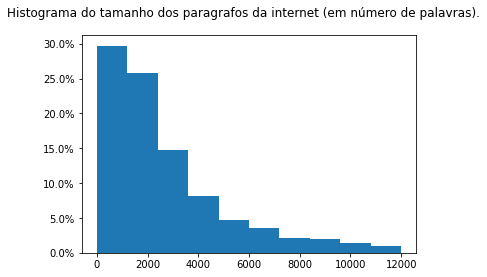

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
plt.hist(web_cluster_sizes, weights=np.ones(len(web_cluster_sizes)) / len(web_cluster_sizes), range=(0, 12000))
plt.suptitle('Histograma do tamanho dos paragrafos da internet (em número de palavras).')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


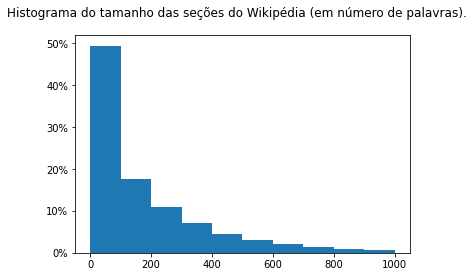

In [9]:
plt.hist(section_sizes,weights=np.ones(len(section_sizes)) / len(section_sizes), range=(0, 1000))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.suptitle('Histograma do tamanho das seções do Wikipédia (em número de palavras).')
plt.show()


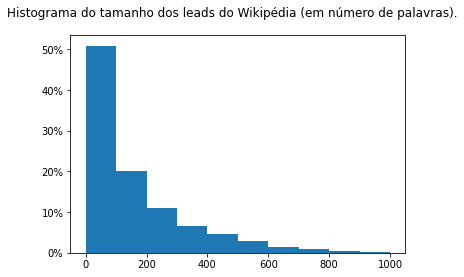

In [11]:
plt.hist(lead_section_sizes,weights=np.ones(len(lead_section_sizes)) / len(lead_section_sizes), range=(0, 1000))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.suptitle('Histograma do tamanho dos leads do Wikipédia (em número de palavras).')
plt.show()


In [12]:
''' Language analysis '''
from langdetect import DetectorFactory, detect
DetectorFactory.seed = 0

pt = 0
en = 0
i = 0
with open(web_file_name, 'r') as web_file:
    for line in web_file:
        article = json.loads(line)
        paragraphs = article['web_paragraphs']
        for paragraph in paragraphs:
            lang = detect(paragraph)
            if(lang == 'en'):
                en = en + 1
            else:
                pt = pt + 1
        print(i, pt, en)
        i = i + 1
        if(i == 1000):
            break

p_pt = float(pt)/(pt + en)
p_en = float(en)/(pt + en)
print(p_pt, p_en)

0 25 91
1 25 826
2 35 1051
3 35 1133
4 104 1473
5 132 1480
6 148 1598
7 181 1598
8 181 2387
9 182 2519
10 192 2593
11 192 2624
12 192 3238
13 258 3429
14 497 3563
15 538 3622
16 621 3634
17 621 3892
18 681 3904
19 681 4163
20 732 4191
21 745 4201
22 755 4484
23 758 4508
24 792 4514
25 826 4630
26 829 4847
27 846 4856
28 846 5754
29 902 5772
30 1079 5782
31 1079 6030
32 1223 6034
33 1229 6139
34 1301 6158
35 1312 6166
36 1358 6208
37 1362 6296
38 1362 6347
39 1365 6405
40 1397 7040
41 1438 7365
42 1438 7447
43 1439 7457
44 1439 7679
45 1514 7759
46 1514 7795
47 1514 7818
48 1516 7839
49 1516 7905
50 1518 7962
51 1518 8004
52 1519 8069
53 1519 8081
54 1537 8143
55 1551 8146
56 1551 8177
57 1551 8518
58 1710 8543
59 1710 9163
60 1719 9205
61 1765 9235
62 1908 9236
63 1927 9250
64 2294 9260
65 2349 9304
66 2349 9472
67 2349 9494
68 2426 9573
69 2426 9604
70 2426 9624
71 2518 9630
72 2635 9640
73 2675 9710
74 2675 9724
75 2675 9747
76 2675 9763
77 2752 10076
78 2768 10108
79 2808 10128
80 2

539 27839 74574
540 27841 74593
541 28001 74625
542 28003 75026
543 28003 75103
544 28003 75266
545 28003 75354
546 28003 75552
547 28015 75567
548 28016 75679
549 28016 75708
550 28020 75850
551 28020 76287
552 28037 76919
553 28037 77082
554 28040 77220
555 28104 77246
556 28126 77267
557 28127 77339
558 28265 77358
559 28265 77418
560 28265 77443
561 28350 77455
562 28521 77465
563 28537 77502
564 28537 77518
565 28861 77601
566 28861 77834
567 28928 77849
568 29017 77880
569 29034 77972
570 29034 78016
571 29034 78070
572 29373 78074
573 29392 78150
574 29409 78166
575 29440 78218
576 29440 78268
577 29445 78299
578 29445 78350
579 29472 78350
580 29472 78478
581 29472 78537
582 29549 78541
583 29549 78590
584 29549 78731
585 29549 78833
586 29563 78847
587 29597 79065
588 29597 79095
589 29597 79131
590 29654 79136
591 29654 79185
592 29654 79412
593 29658 79426
594 29674 79428
595 29834 79429
596 29887 79434
597 29887 79460
598 29897 79460
599 29897 79488
600 29936 79527
601 3006

In [11]:
''' generate pt-only input data '''
from langdetect import DetectorFactory, detect
DetectorFactory.seed = 0

def persist_data(item, file):
    to_out = json.dumps(item, ensure_ascii=False).encode('utf-8')+'\n'.encode('utf-8')
    file.write(to_out)

file_name = 'p5024909p6524729.json'
web_file_name = path + file_name + '-WEB'
pt_only_path = 'processed_examples/pt_v2/'
pt_only_file_name = pt_only_path + file_name + '-WEB'
pt = 0
en = 0
i = 0
with open(pt_only_file_name, 'wb+') as pt_web_file: 
    with open(web_file_name, 'r') as web_file:
        for line in web_file:
            article = json.loads(line)
            paragraphs = article['web_paragraphs']
            wiki_id = article['id']
            wiki_title = article['title']
            pt_paragraphs = []
            for paragraph in paragraphs:
                lang = detect(paragraph)
                if(lang == 'en'):
                    en = en + 1
                else:
                    pt = pt + 1
                    pt_paragraphs.append(paragraph)
            if(len(pt_paragraphs) > 0):
                persist_data({'id' : wiki_id, 'title' : wiki_title, 'web_paragraphs' : pt_paragraphs}, pt_web_file)
            print(i, pt, en)
            i = i + 1
            #if(i == 1000):
            #    break

p_pt = float(pt)/(pt + en)
p_en = float(en)/(pt + en)
print(p_pt, p_en)

0 1 91
1 2 249
2 14 257
3 15 277
4 19 299
5 71 313
6 71 326
7 78 457
8 78 472
9 127 472
10 127 581
11 202 731
12 202 833
13 281 913
14 281 970
15 286 976
16 286 996
17 286 1082
18 286 1134
19 286 1155
20 310 1163
21 310 1186
22 311 1333
23 311 1345
24 311 1437
25 311 1511
26 312 1740
27 312 1872
28 312 1950
29 339 1976
30 339 2146
31 366 2210
32 387 2313
33 392 2357
34 471 2358
35 471 2473
36 471 2484
37 471 2515
38 471 2547
39 471 3309
40 471 3322
41 472 3411
42 473 3429
43 474 3488
44 501 3488
45 502 3507
46 516 3524
47 520 3620
48 530 3633
49 530 3717
50 538 3732
51 548 3745
52 560 3760
53 568 3771
54 576 3782
55 584 3793
56 584 3827
57 584 3892
58 584 3967
59 646 3967
60 646 3981
61 646 4123
62 646 4255
63 646 4755
64 646 4796
65 646 4812
66 723 4862
67 874 4867
68 874 4880
69 878 4896
70 882 4928
71 888 4944
72 888 4956
73 895 4980
74 895 4993
75 895 5063
76 992 5071
77 999 5130
78 1012 5144
79 1012 5168
80 1012 5269
81 1012 5495
82 1012 5557
83 1012 5713
84 1012 5745
85 1012 5787

567 10291 55476
568 10291 55502
569 10328 55507
570 10333 55519
571 10334 55534
572 10334 55604
573 10335 56269
574 10335 56314
575 10335 56412
576 10346 56558
577 10365 56563
578 10500 56566
579 10564 56572
580 10672 56584
581 10750 56614
582 10766 56614
583 10766 56646
584 10839 56689
585 10839 56788
586 10917 56794
587 10918 56918
588 10922 57037
589 10922 57239
590 11009 57252
591 11009 57352
592 11009 57448
593 11020 57456
594 11020 57967
595 11020 57977
596 11026 57989
597 11220 57993
598 11231 57993
599 11231 58074
600 11246 58074
601 11246 58198
602 11261 58271
603 11357 58271
604 11381 58279
605 11420 58280
606 11420 58343
607 11570 58446
608 11600 58446
609 11600 58456
610 11600 58474
611 11600 58555
612 11600 58604
613 11600 58739
614 11681 58820
615 11681 58892
616 11681 59349
617 11902 59365
618 11976 59375
619 12000 59458
620 12000 59490
621 12000 59528
622 12015 59528
623 12015 59541
624 12015 59595
625 12021 59617
626 12021 59684
627 12097 59786
628 12250 59905
629 1225

1075 19671 86133
1076 19682 86133
1077 19686 90434
1078 19694 90567
1079 19744 90597
1080 19807 90604
1081 19875 90618
1082 19876 90653
1083 19876 90695
1084 19876 90744
1085 19876 90798
1086 19876 90838
1087 19887 90846
1088 19887 90936
1089 19887 91019
1090 19905 91019
1091 19936 91051
1092 19968 91052
1093 19968 91092
1094 19968 91233
1095 19968 91328
1096 20000 91375
1097 20028 91375
1098 20029 91407
1099 20029 91455
1100 20029 91765
1101 20029 91822
1102 20030 91873
1103 20030 91989
1104 20030 92026
1105 20030 92045
1106 20030 92099
1107 20030 92393
1108 20049 92393
1109 20049 92558
1110 20049 92591
1111 20126 92618
1112 20126 92634
1113 20126 92651
1114 20132 92695
1115 20282 92781
1116 20290 92825
1117 20293 93016
1118 20434 93025
1119 20434 93064
1120 20502 93076
1121 20502 93196
1122 20538 93196
1123 20553 93200
1124 20556 93315
1125 20556 93382
1126 20568 93383
1127 20586 93400
1128 20587 93692
1129 20588 93821
1130 20609 93829
1131 20712 93831
1132 20712 93960
1133 20712 940

1538 29321 130762
1539 29326 130837
1540 29327 130928
1541 29332 130950
1542 29332 131096
1543 29353 131206
1544 29386 131214
1545 29386 131343
1546 29386 131368
1547 29396 131469
1548 29520 131513
1549 29520 131548
1550 29520 131583
1551 29538 131599
1552 29585 131605
1553 29613 131705
1554 29613 131768
1555 29613 131928
1556 29613 132028
1557 29613 132128
1558 29720 132143
1559 29720 132243
1560 29720 132343
1561 29720 132631
1562 29738 132631
1563 29738 132731
1564 29738 132831
1565 29741 133342
1566 29753 133444
1567 29753 133538
1568 29755 133646
1569 29755 133721
1570 29756 133778
1571 29787 133778
1572 29787 133937
1573 29846 133952
1574 29846 134052
1575 29860 134052
1576 29860 134152
1577 29860 134252
1578 29860 134312
1579 29860 134412
1580 29963 134416
1581 29963 134476
1582 29963 134536
1583 29963 134815
1584 30000 134958
1585 30000 135018
1586 30000 135048
1587 30000 135096
1588 30031 135105
1589 30053 135121
1590 30080 135145
1591 30080 135171
1592 30156 135281
1593 30209

1995 38050 175208
1996 38050 175270
1997 38125 175330
1998 38125 175375
1999 38138 175375
2000 38208 175457
2001 38233 175467
2002 38233 175482
2003 38233 175495
2004 38237 175640
2005 38237 175798
2006 38237 175986
2007 38237 176017
2008 38244 176115
2009 38317 176124
2010 38357 176130
2011 38357 176172
2012 38414 176172
2013 38629 176172
2014 38629 176242
2015 38791 176242
2016 38791 176260
2017 38794 176337
2018 38794 176363
2019 38853 176364
2020 38853 176445
2021 38853 176491
2022 38879 176491
2023 38879 176506
2024 38879 176584
2025 38896 176588
2026 38897 176690
2027 38897 176714
2028 38897 176729
2029 38897 176751
2030 38897 176882
2031 38897 176912
2032 38898 176962
2033 38898 177544
2034 38907 177628
2035 38909 177900
2036 38909 177924
2037 38909 177962
2038 38924 177962
2039 38937 177962
2040 38976 177962
2041 38976 177987
2042 38976 178184
2043 38995 178222
2044 38995 178346
2045 38995 178441
2046 39107 178442
2047 39107 178519
2048 39116 178636
2049 39124 178735
2050 39201

2451 47441 222124
2452 47441 222164
2453 47441 222323
2454 47441 222350
2455 47518 222384
2456 47518 222469
2457 47518 222582
2458 47542 222583
2459 47571 222583
2460 47587 222702
2461 47613 222808
2462 47613 222997
2463 47613 223218
2464 47615 223294
2465 47636 223362
2466 47683 223537
2467 47697 224035
2468 47697 224298
2469 47723 224320
2470 47723 224365
2471 47723 224491
2472 47782 224497
2473 47782 224573
2474 47782 224606
2475 47782 224933
2476 47793 224989
2477 47793 225044
2478 47817 225080
2479 47823 225085
2480 47823 225101
2481 47823 225139
2482 47837 225304
2483 47841 225315
2484 47841 225382
2485 47841 225410
2486 47842 225419
2487 47844 225913
2488 47846 225961
2489 47885 225979
2490 47888 225987
2491 47888 226076
2492 47888 226114
2493 47888 226173
2494 47888 226193
2495 47909 226243
2496 47985 226308
2497 47997 226308
2498 48074 226388
2499 48096 226447
2500 48096 226474
2501 48096 226597
2502 48097 226786
2503 48097 226804
2504 48097 226923
2505 48097 226941
2506 48113

2907 52363 263397
2908 52363 263426
2909 52363 263459
2910 52363 263518
2911 52389 263518
2912 52405 263518
2913 52405 263575
2914 52406 263720
2915 52409 263792
2916 52467 263792
2917 52486 263794
2918 52569 263799
2919 52580 263799
2920 52694 263800
2921 52712 263808
2922 52735 263808
2923 52748 263808
2924 52748 263858
2925 52748 263880
2926 52779 263880
2927 52806 263895
2928 52807 264031
2929 52849 264034
2930 52855 264047
2931 52874 264047
2932 52963 264063
2933 52963 264213
2934 53044 264216
2935 53044 264409
2936 53062 264410
2937 53062 264429
2938 53102 264429
2939 53102 264551
2940 53108 264578
2941 53128 264578
2942 53128 264614
2943 53157 264614
2944 53177 264614
2945 53177 264655
2946 53217 264671
2947 53217 264723
2948 53217 264833
2949 53239 264841
2950 53324 264849
2951 53390 264865
2952 53430 264865
2953 53470 264865
2954 53496 264865
2955 53520 264865
2956 53576 264865
2957 53590 264865
2958 53590 264940
2959 53619 264956
2960 53628 264961
2961 53707 264985
2962 53737

3364 58986 291497
3365 59039 291653
3366 59039 291676
3367 59113 291676
3368 59113 291916
3369 59113 291944
3370 59189 292010
3371 59220 292010
3372 59313 292012
3373 59489 292033
3374 59490 292075
3375 59530 292083
3376 59607 292136
3377 59630 292136
3378 59657 292140
3379 59657 292162
3380 59678 292162
3381 59678 292401
3382 59678 292430
3383 59679 292445
3384 59708 292459
3385 59708 292505
3386 59708 292532
3387 59715 292585
3388 59715 292666
3389 59719 292676
3390 59719 292710
3391 59745 292761
3392 59745 292821
3393 59745 292843
3394 59746 292882
3395 59768 292882
3396 59788 292895
3397 59788 292907
3398 59788 292950
3399 59788 293082
3400 59788 293178
3401 59788 293283
3402 59788 293437
3403 59788 293523
3404 59788 293726
3405 59843 293871
3406 59932 293879
3407 59989 293923
3408 59989 294092
3409 59989 294571
3410 60044 294577
3411 60055 294835
3412 60136 294947
3413 60136 294994
3414 60138 295025
3415 60140 295056
3416 60263 295059
3417 60293 295083
3418 60298 295192
3419 60302

3820 63962 320632
3821 63962 320679
3822 63962 320742
3823 63962 320890
3824 63962 320915
3825 63962 320960
3826 63962 321056
3827 63962 321097
3828 63963 321145
3829 63963 321171
3830 63982 321225
3831 63983 321315
3832 63992 321427
3833 63992 321471
3834 63993 321510
3835 63994 321596
3836 63994 321652
3837 63994 321691
3838 63994 321758
3839 63994 321789
3840 64010 321892
3841 64010 321916
3842 64010 321950
3843 64014 322039
3844 64014 322122
3845 64014 322197
3846 64014 322223
3847 64014 322250
3848 64021 322327
3849 64021 322351
3850 64021 322384
3851 64021 322470
3852 64021 322518
3853 64021 322688
3854 64021 322727
3855 64023 322835
3856 64023 322873
3857 64023 322930
3858 64024 322940
3859 64025 322961
3860 64025 322982
3861 64025 323032
3862 64025 323072
3863 64053 323153
3864 64053 323222
3865 64053 323252
3866 64053 323276
3867 64053 323320
3868 64054 323507
3869 64056 323561
3870 64056 323588
3871 64056 323627
3872 64056 323822
3873 64056 323954
3874 64056 323975
3875 64107

4276 69555 408467
4277 69555 408754
4278 69555 408814
4279 69555 408869
4280 69555 408910
4281 69555 408930
4282 69555 408969
4283 69555 409118
4284 69555 409164
4285 69555 409184
4286 69555 409268
4287 69555 409629
4288 69611 409633
4289 69716 409639
4290 69730 409639
4291 69730 409693
4292 69806 409883
4293 69806 410041
4294 69806 410053
4295 69806 410063
4296 69835 410064
4297 69835 410085
4298 69835 410099
4299 69835 410235
4300 69885 410235
4301 69885 410309
4302 69891 410314
4303 69891 410355
4304 69892 410556
4305 69892 410614
4306 69935 410614
4307 69968 410615
4308 69988 410615
4309 70013 410615
4310 70015 410649
4311 70033 410719
4312 70033 410918
4313 70033 411028
4314 70033 411114
4315 70043 411143
4316 70043 411345
4317 70077 411384
4318 70077 411399
4319 70077 411655
4320 70078 411673
4321 70081 411778
4322 70081 411818
4323 70082 411894
4324 70082 412181
4325 70144 412189
4326 70157 412198
4327 70157 412274
4328 70157 412364
4329 70157 412377
4330 70157 412916
4331 70333

4733 81210 449160
4734 81210 449280
4735 81210 449311
4736 81210 449395
4737 81210 449497
4738 81210 449507
4739 81210 449557
4740 81227 449558
4741 81227 449614
4742 81227 449655
4743 81227 449748
4744 81275 449768
4745 81299 449808
4746 81299 449936
4747 81299 449978
4748 81332 449978
4749 81332 450042
4750 81403 450055
4751 81403 450066
4752 81403 450123
4753 81403 450226
4754 81403 450265
4755 81403 450293
4756 81427 450296
4757 81512 450307
4758 81512 450350
4759 81512 450390
4760 81512 450482
4761 81516 450616
4762 81524 450624
4763 81525 450679
4764 81525 450713
4765 81525 451321
4766 81525 451344
4767 81553 451357
4768 81553 451420
4769 81553 451482
4770 81553 451511
4771 81585 451520
4772 81585 451590
4773 81585 451679
4774 81585 451698
4775 81585 451796
4776 81601 451800
4777 81602 451810
4778 81736 451819
4779 81736 451908
4780 81736 451989
4781 81736 452014
4782 81784 452058
4783 81845 452064
4784 81845 452131
4785 81921 452185
4786 81922 452203
4787 82014 452207
4788 82033

5190 89897 482301
5191 89897 482549
5192 89906 482581
5193 89906 482608
5194 89927 482726
5195 89927 482756
5196 89927 483164
5197 89928 483302
5198 89928 483323
5199 89962 483340
5200 89962 483376
5201 89962 484625
5202 89981 484633
5203 89987 484744
5204 89987 484777
5205 89987 484914
5206 89987 484960
5207 89987 484976
5208 89987 485046
5209 90200 485052
5210 90200 485075
5211 90200 485086
5212 90200 485164
5213 90207 485259
5214 90249 485306
5215 90253 485325
5216 90296 485325
5217 90296 485459
5218 90296 485471
5219 90296 485561
5220 90298 485599
5221 90298 485707
5222 90298 485759
5223 90298 485772
5224 90298 485799
5225 90298 485823
5226 90396 485834
5227 90396 485877
5228 90396 485937
5229 90414 485955
5230 90439 485963
5231 90439 486029
5232 90439 486094
5233 90448 486095
5234 90448 486120
5235 90448 486172
5236 90490 486172
5237 90490 486226
5238 90540 486226
5239 90561 486226
5240 90561 486240
5241 90561 486281
5242 90561 486368
5243 90561 486397
5244 90561 486412
5245 90632

5646 97259 514204
5647 97269 514211
5648 97269 514238
5649 97269 514258
5650 97278 514309
5651 97313 514310
5652 97495 514346
5653 97544 514360
5654 97545 514390
5655 97545 514466
5656 97545 514492
5657 97545 514522
5658 97545 514560
5659 97545 514578
5660 97546 514652
5661 97596 514711
5662 97858 514717
5663 98432 514730
5664 98442 514740
5665 98456 514740
5666 98461 514751
5667 98464 514759
5668 98512 514759
5669 98512 514790
5670 98517 514825
5671 98517 514941
5672 98523 515004
5673 98530 515068
5674 98537 515079
5675 98537 515155
5676 98537 515166
5677 98537 515202
5678 98549 515205
5679 99216 515229
5680 99237 515330
5681 99237 515347
5682 99243 515354
5683 99243 515412
5684 99243 515478
5685 99243 515488
5686 99243 515570
5687 99243 515586
5688 99260 515633
5689 99366 515633
5690 99366 515669
5691 99368 515725
5692 99368 515777
5693 99368 515794
5694 99368 515837
5695 99386 515845
5696 99386 515867
5697 99386 515913
5698 99439 515927
5699 99439 515983
5700 99442 515994
5701 99460

6081 107021 550961
6082 107021 551030
6083 107021 551067
6084 107023 551087
6085 107023 551182
6086 107025 551288
6087 107025 551474
6088 107025 551600
6089 107025 551641
6090 107029 551752
6091 107032 551834
6092 107133 551834
6093 107133 551858
6094 107133 551923
6095 107133 551999
6096 107146 552163
6097 107173 552165
6098 107173 552181
6099 107173 552249
6100 107181 552262
6101 107204 552262
6102 107265 552270
6103 107300 552270
6104 107334 552292
6105 107366 552361
6106 107387 552361
6107 107387 552437
6108 107421 552443
6109 107421 552487
6110 107428 552575
6111 107428 552627
6112 107428 552641
6113 107428 552726
6114 107428 552736
6115 107428 552880
6116 107428 552893
6117 107461 552901
6118 107474 552903
6119 107530 552903
6120 107530 553017
6121 107541 553017
6122 107541 553125
6123 107541 553510
6124 107606 553510
6125 107606 553567
6126 107606 553742
6127 107606 553752
6128 107627 553752
6129 107713 553862
6130 107723 553868
6131 107737 553874
6132 107737 553983
6133 107737 

6514 116536 579533
6515 116548 579553
6516 116548 579604
6517 116587 579605
6518 116587 579658
6519 116606 579704
6520 116627 579708
6521 116629 579719
6522 116629 579858
6523 116801 579870
6524 116801 580014
6525 116804 580042
6526 116804 580085
6527 116905 580110
6528 116979 580115
6529 116980 580309
6530 116980 580358
6531 116980 580445
6532 116980 580493
6533 116980 580676
6534 117005 580676
6535 117005 580810
6536 117005 580925
6537 117005 580978
6538 117005 581051
6539 117007 581183
6540 117007 581199
6541 117007 581583
6542 117007 581603
6543 117007 581639
6544 117013 582832
6545 117013 582857
6546 117013 582894
6547 117013 582911
6548 117039 582911
6549 117094 582912
6550 117094 582929
6551 117177 582964
6552 117255 582965
6553 117259 583258
6554 117259 583287
6555 117259 583328
6556 117259 583347
6557 117259 583423
6558 117259 583466
6559 117259 583498
6560 117260 583625
6561 117273 583663
6562 117273 583697
6563 117334 583713
6564 117334 583768
6565 117334 583822
6566 117334 

6946 124734 627556
6947 124764 627563
6948 124764 627664
6949 124764 627743
6950 124765 627846
6951 124809 627854
6952 124815 627926
6953 124823 627929
6954 124850 627929
6955 124850 627979
6956 124850 628011
6957 124927 628011
6958 125023 628014
6959 125024 628061
6960 125150 628062
6961 125153 628072
6962 125155 628080
6963 125166 628084
6964 125166 628226
6965 125187 628241
6966 125187 628274
6967 125187 628308
6968 125221 628322
6969 125332 628322
6970 125344 628322
6971 125421 628397
6972 125431 628405
6973 125507 628578
6974 125517 628581
6975 125517 628593
6976 125662 628715
6977 125792 628717
6978 125792 628763
6979 125858 628763
6980 125864 628966
6981 125865 629251
6982 125865 629261
6983 125865 629277
6984 125865 629291
6985 125865 629313
6986 125870 629318
6987 125870 629461
6988 125870 629623
6989 125872 630391
6990 125872 630401
6991 125913 630404
6992 125913 630427
6993 125937 630438
6994 125938 630605
6995 125972 630606
6996 125972 630643
6997 125972 630742
6998 125972 

7378 133144 664790
7379 133144 664800
7380 133146 664859
7381 133146 665283
7382 133157 665291
7383 133157 665302
7384 133160 665825
7385 133160 665858
7386 133160 665889
7387 133160 666050
7388 133160 666118
7389 133160 666131
7390 133160 666149
7391 133160 666161
7392 133168 666249
7393 133243 666250
7394 133243 666276
7395 133243 666399
7396 133243 666548
7397 133288 666556
7398 133333 666609
7399 133410 666844
7400 133451 666847
7401 133456 666855
7402 133456 666974
7403 133456 667039
7404 133469 667074
7405 133501 667087
7406 133501 667109
7407 133503 667123
7408 133503 667175
7409 133579 667219
7410 133625 667237
7411 133625 667260
7412 133724 667260
7413 133724 667446
7414 133724 667474
7415 133726 667667
7416 133731 667917
7417 133744 668027
7418 133808 668042
7419 133808 668067
7420 133954 668091
7421 133954 668181
7422 134002 668188
7423 134048 668258
7424 134059 668259
7425 134121 668259
7426 134122 668324
7427 134122 668354
7428 134122 668381
7429 134122 668411
7430 134208 

7810 143943 693432
7811 143943 693639
7812 143943 693674
7813 143980 693723
7814 143997 693723
7815 143997 693777
7816 144025 693777
7817 144096 693778
7818 144118 693781
7819 144118 693821
7820 144118 693904
7821 144118 693961
7822 144210 694029
7823 144210 694088
7824 144210 694195
7825 144210 694388
7826 144210 694439
7827 144210 694458
7828 144210 694476
7829 144210 694686
7830 144210 694733
7831 144250 694742
7832 144250 694787
7833 144250 694823
7834 144268 694854
7835 144268 694970
7836 144268 695033
7837 144274 695039
7838 144274 695083
7839 144280 695208
7840 144280 695842
7841 144280 696209
7842 144280 696240
7843 144280 696308
7844 144280 696338
7845 144280 696362
7846 144280 696405
7847 144280 696440
7848 144280 696594
7849 144280 696607
7850 144280 696623
7851 144299 696623
7852 144299 696688
7853 144331 696703
7854 144331 696780
7855 144343 696783
7856 144344 696798
7857 144485 696801
7858 144485 696995
7859 144485 697103
7860 144485 697164
7861 144493 697211
7862 144505 

8242 150407 722890
8243 150408 722993
8244 150408 723090
8245 150409 723497
8246 150413 723556
8247 150435 723591
8248 150435 723608
8249 150435 723623
8250 150435 723739
8251 150435 723806
8252 150441 723832
8253 150454 723832
8254 150454 723945
8255 150454 723995
8256 150469 724003
8257 150469 724103
8258 150490 724190
8259 150490 724201
8260 150512 724211
8261 150512 724239
8262 150611 724252
8263 150615 724260
8264 150615 724311
8265 150634 724312
8266 150634 724596
8267 150637 724605
8268 150685 724608
8269 150686 724645
8270 150713 724646
8271 150713 724661
8272 150725 724661
8273 150726 724968
8274 150759 724982
8275 150759 724994
8276 150771 725044
8277 150771 725055
8278 150808 725059
8279 150808 725071
8280 150811 725079
8281 150811 725236
8282 150811 725292
8283 150811 725341
8284 150827 725350
8285 150885 725350
8286 151053 725359
8287 151053 725567
8288 151053 725622
8289 151096 725623
8290 151102 725689
8291 151102 725700
8292 151144 725701
8293 151238 725739
8294 151238 

8674 159266 754174
8675 159382 754220
8676 159382 754249
8677 159382 754316
8678 159402 754316
8679 159413 754394
8680 159507 754402
8681 159525 754402
8682 159525 754548
8683 159525 754579
8684 159535 755052
8685 159535 755083
8686 159582 755084
8687 159582 755113
8688 159582 755137
8689 159582 755158
8690 159582 755191
8691 159633 755194
8692 159633 755376
8693 159633 755412
8694 159641 755427
8695 159654 755427
8696 159654 755460
8697 159688 755469
8698 159693 755487
8699 159729 755490
8700 159729 755533
8701 159730 755577
8702 159731 755595
8703 159731 755636
8704 159732 755741
8705 159732 755762
8706 159732 755792
8707 159732 755952
8708 159732 756007
8709 159732 756042
8710 159733 756191
8711 159733 756286
8712 159733 756511
8713 159831 756518
8714 159831 756638
8715 159831 756710
8716 159831 757161
8717 159831 757172
8718 159884 757172
8719 159885 757254
8720 159885 757455
8721 159885 757476
8722 159905 757476
8723 159905 757496
8724 159999 757504
8725 159999 757544
8726 160055 

9106 166321 789432
9107 166321 789535
9108 166321 789546
9109 166322 789629
9110 166322 789809
9111 166322 789829
9112 166322 789984
9113 166326 790000
9114 166326 790050
9115 166326 790078
9116 166326 790202
9117 166364 790202
9118 166364 791069
9119 166364 791226
9120 166364 791241
9121 166364 791489
9122 166370 791510
9123 166370 791528
9124 166370 791578
9125 166586 791584
9126 166586 791783
9127 166586 791881
9128 166590 791897
9129 166590 792051
9130 166590 792091
9131 166607 792092
9132 166628 792092
9133 166821 792093
9134 166821 792176
9135 166822 792188
9136 166851 792188
9137 166851 792227
9138 166851 792814
9139 166851 793061
9140 166867 793177
9141 166867 793379
9142 166867 793434
9143 166867 793459
9144 166868 793506
9145 166868 793525
9146 166868 793538
9147 166878 793581
9148 166878 793701
9149 166883 793753
9150 166883 793786
9151 166883 793823
9152 166883 793849
9153 166883 793871
9154 166884 793948
9155 166971 793952
9156 166998 793952
9157 167490 793953
9158 167490 

9538 178438 820642
9539 178438 820677
9540 178438 820836
9541 178586 820855
9542 178586 820925
9543 178586 821076
9544 178618 821085
9545 178639 821089
9546 178639 821406
9547 178639 821564
9548 178639 821677
9549 178668 821689
9550 178668 821735
9551 178668 821767
9552 178668 822107
9553 178668 822178
9554 179044 822181
9555 179297 822187
9556 179320 822203
9557 179345 822204
9558 179392 822221
9559 179455 822223
9560 179515 822227
9561 179515 822310
9562 179733 822321
9563 179765 822321
9564 179771 822326
9565 179771 822378
9566 179775 822386
9567 179856 822394
9568 180070 822404
9569 180145 822404
9570 180207 822525
9571 180207 822741
9572 180245 822742
9573 180275 822742
9574 180295 822742
9575 180318 822744
9576 180363 822747
9577 180441 822756
9578 180481 822756
9579 180501 822756
9580 180501 822861
9581 180501 822895
9582 180502 823027
9583 180517 823113
9584 180517 823244
9585 180517 823259
9586 180517 823974
9587 180538 823990
9588 180538 824180
9589 180578 824180
9590 180584 

9970 188483 849413
9971 188483 849454
9972 188483 849530
9973 188483 849616
9974 188490 849637
9975 188490 849821
9976 188491 849858
9977 188517 849863
9978 188517 850007
9979 188557 850022
9980 188558 850214
9981 188571 850398
9982 188571 850496
9983 188571 850515
9984 188572 850539
9985 188577 850646
9986 188577 850659
9987 188577 850703
9988 188586 850744
9989 188586 850758
9990 188586 850793
9991 188586 850871
9992 188592 850968
9993 188592 851064
9994 188624 851138
9995 188624 851243
9996 188624 851253
9997 188624 851280
9998 188624 851363
9999 188624 851434
10000 188624 851476
10001 188624 851536
10002 188630 851573
10003 188630 851727
10004 188636 851915
10005 188671 851990
10006 188671 852030
10007 188685 852054
10008 188748 852054
10009 188748 852149
10010 188748 852163
10011 188748 852200
10012 188753 852370
10013 188753 852420
10014 188753 852475
10015 188763 852520
10016 188763 852619
10017 188770 852715
10018 188832 852729
10019 188832 852878
10020 188832 852911
10021 1888

10382 196040 880571
10383 196041 880594
10384 196046 880606
10385 196046 880657
10386 196046 880709
10387 196150 880709
10388 196150 880865
10389 196150 881024
10390 196150 881138
10391 196150 881207
10392 196150 881220
10393 196196 881235
10394 196196 881275
10395 196233 881601
10396 196281 881629
10397 196281 881698
10398 196281 881713
10399 196281 881764
10400 196281 881783
10401 196317 881783
10402 196317 881880
10403 196317 881946
10404 196328 882066
10405 196490 882066
10406 196490 882124
10407 196490 882168
10408 196490 882181
10409 196490 882850
10410 196811 882898
10411 196811 882978
10412 196811 883059
10413 196811 883096
10414 196811 883131
10415 196811 883145
10416 196817 883220
10417 196817 883309
10418 196820 883318
10419 196822 883482
10420 196822 883508
10421 196885 883536
10422 196885 883549
10423 196885 883607
10424 196885 883680
10425 196885 883880
10426 196885 884088
10427 196885 884110
10428 196885 884168
10429 196904 884168
10430 196904 884264
10431 196904 884335


10792 204171 904652
10793 204175 904663
10794 204175 904708
10795 207620 904775
10796 207634 904803
10797 207634 904824
10798 207634 905248
10799 207634 905291
10800 207634 905386
10801 207634 905423
10802 207634 905450
10803 207634 905526
10804 207634 905553
10805 207782 905555
10806 207822 905563
10807 207964 905576
10808 208008 905640
10809 208132 905693
10810 208132 906684
10811 208141 906751
10812 208141 906777
10813 208141 906815
10814 208142 909132
10815 208254 909140
10816 208332 909315
10817 208397 909315
10818 208397 909509
10819 208417 909509
10820 208417 909613
10821 208417 909669
10822 208417 909696
10823 208493 909701
10824 208493 909753
10825 208493 909888
10826 208514 909910
10827 208547 909910
10828 208556 910162
10829 208637 910596
10830 208637 910629
10831 208637 910744
10832 208637 910788
10833 208637 910804
10834 208638 910846
10835 208638 910861
10836 208644 910953
10837 208644 910987
10838 208672 911916
10839 208673 911942
10840 208674 911964
10841 208674 911991
